# MIMO for Ground Motion Events

In [1]:
import numpy as np
import mdof
import quakeio
from mdof import modal, transform
from mdof.utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE89324/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

with open('../../Caltrans.Hayward/CGS_data/function_test_zips.txt', 'r') as readfile:
    function_tests = readfile.read().split("\n")
import glob
events = [quakeio.read(event) for event in glob.glob('../CGS_data/58658*P.zip') if event[-33:] not in function_tests]

from pathlib import Path
# for file in Path(directory).glob(pattern):
#     if str(file)[-33:] in function_tests:
#         print(file)
files = [file for file in Path(directory).glob(pattern) if str(file)[-33:] not in function_tests]

In [3]:
data_conf = Config()

# PAINTER RIO DELL TRANSVERSE (CASE 1)
title = "Painter St Bridge Transverse Mode (In: Ch17, Out: Ch9)"
data_conf.inputs  = [3,17,20]
data_conf.outputs = [7,9,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# # HAYWARD TRANSVERSE (CASE 1)
# title = "Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)"
# data_conf.inputs  = [25,2,7,18]
# data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL (CASE 2)
# title = "Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)"
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]
# # HAYWARD LONGITUDINAL Alternative
# title = "Hayward Bridge Longitudinal Mode (In: Ch6, Out: Ch14)"
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`decimation`  | decimation (downsampling) factor
`order` | model order (2 times number of DOF)

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`horizon` | number of observability parameters, or prediction horizon
`nc` | number of controllability parameters

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`horizon` | number of steps used for identification, or prediction horizon

### Parameters for Mode Validation
parameter | value
----------|-------
`outlook` | number of steps used for temporal consistency in EMAC

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.horizon = 190
conf.nc = 190
conf.order  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.1,0.6)
conf.damping = 0.06
conf.pseudo = True
conf.outlook = 190

../CESMD/CE89324/bayview_11oct2013_72086051_ce89324p.zip
peak acceleration (cm/s/s): 87.954


100%|█████████▉| 1310/1311 [00:00<00:00, 2237.95it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2709     0.001132   1.0        0.8338     0.8338   
      0.2527     -0.003276  1.0        0.9749     0.9749   
      0.2409     -0.0003217  1.0        0.8874     0.8874   
      0.2337     -0.0001491  1.0        0.8368     0.8368   
      0.2282     0.03774    1.0        0.9219     0.9219   
      0.2133     0.02379    1.0        0.3374     0.3374   
Mean Period(s): 0.23994997335785784
Standard Dev(s): 0.01829979557828316
../CESMD/CE89324/ferndaleoffshore_08dec2016_us20007z6r_ce89324p.zip
peak acceleration (cm/s/s): -30.371


100%|█████████▉| 686/687 [00:00<00:00, 2885.01it/s]
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/mdof/validation.py:137: RuntimeWarning: divide by zero encountered in scalar divide
  nu[i]    = (s22[i]-s11[i])/(2*s12[i])
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/mdof/validation.py:138: RuntimeWarning: invalid value encountered in scalar multiply
  lam[0,i] = (s11[i]+s22[i])/2 + s12[i]*np.sqrt(nu[i]**2+1)
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/mdof/validation.py:139: RuntimeWarning: invalid value encountered in scalar multiply
  lam[1,i] = (s11[i]+s22[i])/2 - s12[i]*np.sqrt(nu[i]**2+1)


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2359     0.0038     1.0        0.9453     0.9453   
      0.227      0.03918    1.0        0.9725     0.9725   
      0.2238     0.005151   1.0        0.9662     0.9662   
      0.2093     0.009579   1.0        0.604      0.604    
      0.2032     0.02393    1.0        0.9483     0.9483   
Mean Period(s): 0.21983789850293506
Standard Dev(s): 0.011930582991559505
../CESMD/CE89324/ferndale_28jan2015_72387946_ce89324p.zip
peak acceleration (cm/s/s): -285.334


100%|█████████▉| 874/875 [00:00<00:00, 2546.99it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3119     0.01321    1.0        0.8887     0.8887   
      0.2602     -0.004556  1.0        0.7266     0.7266   
      0.2555     0.04334    1.0        0.972      0.972    
      0.2482     0.01867    1.0        0.878      0.878    
      0.2299     0.008439   1.0        0.7712     0.7712   
Mean Period(s): 0.26113898415437486
Standard Dev(s): 0.027387551087975463
../CESMD/CE89324/nc73201181_ce89324p.zip
peak acceleration (cm/s/s): 243.242


100%|█████████▉| 831/832 [00:00<00:00, 2802.56it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.7111     0.06989    1.0        0.2373     0.2373   
      0.2911     0.4793     0.0        0.2207     0.0      
      0.2839     0.01621    1.0        0.9861     0.9861   
      0.2669     0.008783   1.0        0.8865     0.8865   
      0.2449     0.02909    1.0        0.9715     0.9715   
      0.2391     0.09027    0.9849     0.9734     0.9587   
Mean Period(s): 0.3394953575119655
Standard Dev(s): 0.16723260983987168
../CESMD/CE89324/nc73351710_ce89324p.zip
peak acceleration (cm/s/s): -53.539


100%|█████████▉| 868/869 [00:00<00:00, 2740.65it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2298     0.02758    1.0        0.9018     0.9018   
      0.2293     0.01291    1.0        0.6597     0.6597   
      0.2141     0.005794   1.0        0.8125     0.8125   
      0.198      0.01652    1.0        0.954      0.954    
      0.1856     0.007892   1.0        0.9607     0.9607   
      0.1639     0.004047   1.0        0.953      0.953    
Mean Period(s): 0.20345404869738717
Standard Dev(s): 0.023751109375293063
../CESMD/CE89324/nc73666231_ce89324p.zip
peak acceleration (cm/s/s): 30.272


100%|█████████▉| 631/632 [00:00<00:00, 2616.91it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2969     0.04186    1.0        0.3244     0.3244   
      0.2725     0.03001    1.0        0.8513     0.8513   
      0.2432     0.02007    1.0        0.9816     0.9816   
      0.2255     0.03043    1.0        0.8075     0.8075   
      0.2231     0.0144     1.0        0.8528     0.8528   
      0.1644     0.007564   1.0        0.9913     0.9913   
Mean Period(s): 0.23760239670892977
Standard Dev(s): 0.041786791965444915
../CESMD/CE89324/nc73667866_ce89324p.zip
peak acceleration (cm/s/s): 32.846


100%|█████████▉| 647/648 [00:00<00:00, 3019.03it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2674     0.07844    1.0        0.2192     0.2192   
      0.2388     0.01897    1.0        0.08927    0.08927  
      0.2295     0.06567    1.0        0.5181     0.5181   
      0.2229     0.03194    1.0        0.1985     0.1985   
      0.2029     0.0984     0.004007   0.7416     0.002972 
Mean Period(s): 0.23230004145748845
Standard Dev(s): 0.021121709869982592
../CESMD/CE89324/nc73714181_ce89324p.zip
peak acceleration (cm/s/s): 54.457


100%|█████████▉| 694/695 [00:00<00:00, 3319.68it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3978     0.1306     0.999      0.7373     0.7366   
      0.3016     0.02847    1.0        0.7979     0.7979   
      0.2591     0.03579    1.0        0.7103     0.7103   
      0.236      0.009554   1.0        0.8541     0.8541   
      0.2        0.03356    1.0        0.4057     0.4057   
      0.1853     0.004686   1.0        0.1831     0.1831   
Mean Period(s): 0.2633002998041649
Standard Dev(s): 0.0712209453393016
../CESMD/CE89324/nc73821036_ce89324p.zip
peak acceleration (cm/s/s): -1356.923


100%|█████████▉| 1229/1230 [00:00<00:00, 2421.65it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.4041     0.02136    1.0        0.1498     0.1498   
      0.3177     0.008901   1.0        0.8627     0.8627   
      0.3006     0.00409    1.0        0.9268     0.9268   
      0.2818     0.019      1.0        0.9697     0.9697   
      0.2801     0.007793   1.0        0.8783     0.8783   
      0.2441     0.1093     0.0004749  0.9427     0.0004477
Mean Period(s): 0.3047263057826448
Standard Dev(s): 0.049794929438951606
../CESMD/CE89324/nc73821046_ce89324p.zip
peak acceleration (cm/s/s): -139.897


100%|█████████▉| 662/663 [00:00<00:00, 2844.54it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3001     0.04037    1.0        0.7879     0.7879   
      0.2674     0.03467    1.0        0.1593     0.1593   
      0.2591     0.06272    1.0        0.6758     0.6758   
      0.2469     0.03627    1.0        0.8245     0.8245   
      0.2256     0.03078    1.0        0.7015     0.7015   
      0.1745     0.03043    1.0        0.8787     0.8787   
Mean Period(s): 0.24562036099179363
Standard Dev(s): 0.03891069442719765
../CESMD/CE89324/nc73821636_ce89324p.zip
peak acceleration (cm/s/s): 50.951


100%|█████████▉| 673/674 [00:00<00:00, 3177.12it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2833     0.009959   1.0        0.6816     0.6816   
      0.2434     0.01689    1.0        0.8856     0.8856   
      0.2357     0.0112     1.0        0.2451     0.2451   
      0.2286     0.07124    0.9998     0.5308     0.5307   
      0.2061     0.04924    1.0        0.9692     0.9692   
      0.1684     0.03321    1.0        0.5699     0.5699   
Mean Period(s): 0.22757668980327647
Standard Dev(s): 0.03510575192028343
../CESMD/CE89324/nc73827571_ce89324p.zip
peak acceleration (cm/s/s): -1012.657


100%|█████████▉| 914/915 [00:00<00:00, 2689.89it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.6212     0.09436    1.0        0.6528     0.6528   
      0.5406     0.009841   1.0        0.8737     0.8737   
      0.4367     0.04506    1.0        0.2452     0.2452   
      0.317      0.01029    1.0        0.4412     0.4412   
      0.2569     0.08572    0.9968     0.9454     0.9424   
Mean Period(s): 0.4344633802066828
Standard Dev(s): 0.13524874602820816
../CESMD/CE89324/nc73890906_ce89324p.zip
peak acceleration (cm/s/s): 33.218


100%|█████████▉| 694/695 [00:00<00:00, 2891.35it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2607     0.02224    1.0        0.003157   0.003157 
      0.2449     0.006788   1.0        0.9932     0.9932   
      0.24       -0.0008864  1.0        0.8373     0.8373   
      0.2263     0.02832    1.0        0.7906     0.7906   
      0.2163     0.04559    1.0        0.9555     0.9555   
      0.1748     0.001106   1.0        0.2454     0.2454   
Mean Period(s): 0.22716129703326704
Standard Dev(s): 0.027283894562143994
../CESMD/CE89324/petrolia_05dec2016_72733405_ce89324p.zip
peak acceleration (cm/s/s): 165.262


100%|█████████▉| 1310/1311 [00:00<00:00, 2282.88it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2964     0.01012    1.0        0.9602     0.9602   
      0.2634     0.04313    1.0        0.8054     0.8054   
      0.2474     0.0159     1.0        0.8673     0.8673   
      0.2425     0.012      1.0        0.8418     0.8418   
      0.2228     0.01331    1.0        0.4284     0.4284   
      0.2051     0.005986   1.0        0.8064     0.8064   
Mean Period(s): 0.246280600421937
Standard Dev(s): 0.02905011899350602
../CESMD/CE89324/riodell_14sep2012_71842075_ce89324p.zip
peak acceleration (cm/s/s): -219.633


100%|█████████▉| 1310/1311 [00:00<00:00, 2320.65it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2735     0.03582    1.0        0.94       0.94     
      0.2556     0.06232    1.0        0.998      0.998    
      0.2391     0.005624   1.0        0.9759     0.9759   
      0.2049     0.01358    1.0        0.8958     0.8958   
      0.1772     0.0223     1.0        0.8821     0.8821   
      0.1482     0.01812    1.0        0.3485     0.3485   
Mean Period(s): 0.21639806443332765
Standard Dev(s): 0.044021503974172094
../CESMD/CE89324/riodell_19oct2014_72330211_ce89324p.zip
peak acceleration (cm/s/s): -60.641


100%|█████████▉| 671/672 [00:00<00:00, 2351.78it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2918     0.01039    1.0        0.9987     0.9987   
      0.2418     -0.006623  1.0        0.3285     0.3285   
      0.2226     0.02352    1.0        0.9517     0.9517   
      0.1945     0.1566     3.285e-19  0.9412     3.092e-19
      0.1651     0.006289   1.0        0.7292     0.7292   
Mean Period(s): 0.2231605195046272
Standard Dev(s): 0.04301403503187152
../CESMD/CE89324/RioDell_Petrolia_Processed_Data.zip
peak acceleration (cm/s/s): 30.272


100%|█████████▉| 631/632 [00:00<00:00, 2284.98it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2969     0.04186    1.0        0.3244     0.3244   
      0.2725     0.03001    1.0        0.8513     0.8513   
      0.2432     0.02007    1.0        0.9816     0.9816   
      0.2255     0.03043    1.0        0.8075     0.8075   
      0.2231     0.0144     1.0        0.8528     0.8528   
      0.1644     0.007564   1.0        0.9913     0.9913   
Mean Period(s): 0.23760239670892977
Standard Dev(s): 0.041786791965444915


Text(0.5, 0.98, 'Painter St Bridge Transverse Mode (In: Ch17, Out: Ch9)')

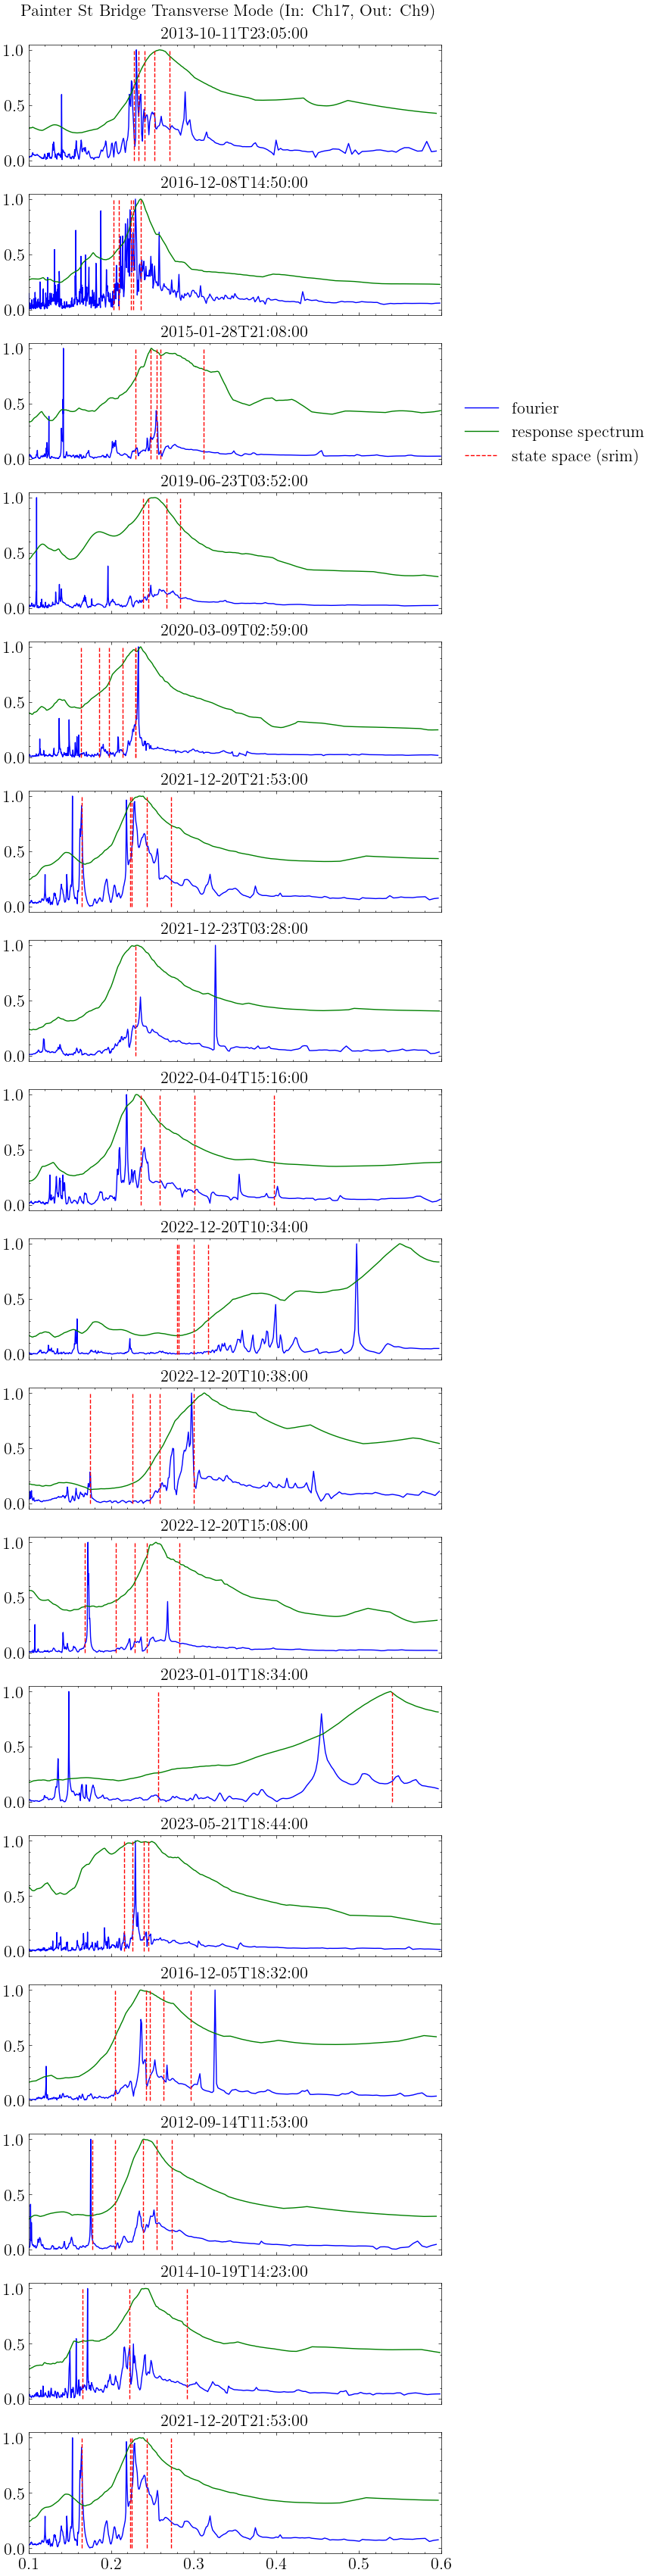

In [5]:
# event_names = ["Berkeley", "San Lorenzo"]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
axi = iter(axs)

method = "srim"

for i, file in enumerate(files):
    ax = next(axi) 
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*"])#, "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf.inputs)
        outpts, dt = extract_channels(event, data_conf.outputs)
        conf.decimation = 8 # decimation factor for state space method
        realization = mdof.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        # raise e
        print(e)
        print(file.name)
        continue
    ss_modes = modal.system_modes(realization,dt,**conf)
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1 # decimation factor for transfer function methods
    periods, amplitudes = transform.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["fourier" if i==0 else None][0], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = transform.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["response spectrum" if i==0 else None][0], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=[f"state space ({method})" if i==0 else None][0])
    ax.set_xlim(conf.period_band)
    ax.set_title(event["event_date"])
fig.legend(bbox_to_anchor=(1.45,0.85))
event_frequencies = mode_statistics(event_modes, "freq")
fig.suptitle(title, fontsize=16)